**FINAL PROJECT 3 : ENSEMBLE**

**KELOMPOK 7**
1. Riko Fajarudin PYTN-KS10-023
2. Mochamad Raffli Ispriyanto PYTN-KS10-022

**PERKENALAN**

Latar Belakang:\
Cardiovascular diseases (CVDs) adalah penyebab kematian nomor satu secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.

Data Penelitian:\
Data ini bernama Heart Failure Prediction yang diperoleh dari https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data. Data ini digunakan untuk memprediksi apakah apakah seorang pasien akan mengalami serangan jantung atau tidak. Jumlah dataset ini adalah 299 baris data dengan 13 atribut.
Atribut yang menjadi label kelas yaitu DEATH_EVENT yang berisi 'No' (Tidak Meninggal) dan 'Yes' (Meninggal).

Objective yang Ingin Dicapai:\
Dalam penelitian ini kami memprediksi dari kumpulan data rekaman penyakit CVD untuk memprediksi kematian akibat penyakit gagal jantung.

Data ini memiliki 13 atribut. Attribute Information:

age - umur pasien\
anaemia - apakah ada pengurangan haemoglobin, 0 = tidak anemia, 1 = punya anemia\
creatinine_phosphokinase - level enzim CPK dalam mcg/L\
diabetes - apakah pasien punya riwayat diabetes, 0 = tidak diabetes, 1 = punya diabetes\
ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung\
high_blood_pressure - apakah pasien punya darah tinggi, 0 = tidak, 1 = iya\
platelets - jumlah platelet di darah dalam kiloplatelets/mL\
serum_creatinine - level serum creatinine di darah dalam mg/dL\
serum_sodium - level serum sodium di darah dalam mEq/L\
sex - apakah pasien Pria atau Wanita, 0 = Wanita, 1 = Pria\
smoking - apakah pasien merokok, 0 = tidak, 1 = iya\
time - waktu dalam hari untuk follow-up\
DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up, 0 = tidak, 1 = iya

**IMPORT LIBRARY**

In [52]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import VotingClassifier ,BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import pickle


**DATA LOADING**

In [2]:
df = pd.read_csv('heart.zip')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Analisis
1. Rata-rata variabel "DEATH_EVENT", adalah 0.32, yang menunjukkan bahwa 32 persen pengamatan dalam kumpulan data memiliki DEATH_EVENT sama dengan 1.Oleh karena itu, akurasi garis dasar adalah 68 persen dan model yang kami buat pasti akan mengalahkan tolok ukur garis dasar ini.
2. Selain itu, dataset memiliki tingkat ketidakseimbangan kelas yang ringan sehingga akurasi saja tidak cukup untuk menentukan performa model.
3. Fitur creatine_phosphokinase dan platelet memiliki variasi yang sangat besar dibandingkan dengan fitur lainnya.
Usia berkisar antara 40 hingga 95 tahun dengan rata-rata 60 tahun. Jadi dataset condong ke populasi yang lebih tua.
4. Rerata variabel jenis kelamin adalah 0.65 yang menunjukkan bahwa variabel tersebut condong ke laki-laki (jenis kelamin=1)

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
categoricals = ['anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking',
                'DEATH_EVENT']
numericals = ['age',
              'creatinine_phosphokinase',
              'ejection_fraction',
              'platelets',
              'serum_creatinine',
              'serum_sodium',
              'time']

In [9]:
# rename kolom dari datasets
def rename_columns_df(df):
    df = df.rename(
        columns={
            'age': 'umur',
            'anaemia' : 'anemia',
            'diabetes' : 'diabetes',
            'high_blood_pressure' : 'hipertensi',
            'sex' : 'kelamin',
            'smoking' : 'perokok',
            'creatinine_phosphokinase' : 'kreatinin_fosfokinase',
            'ejection_fraction' : 'fraksi_ejeksi',
            'platelets' : 'trombositosis',
            'serum_creatinine' : 'serum_kreatinin',
            'serum_sodium' : 'serum_sodium',
            'DEATH_EVENT' : 'kematian',
            'time' : 'waktu'    
        }
    )
    return df

In [10]:
df = rename_columns_df(df)
df

,umur,anemia,kreatinin_fosfokinase,diabetes,fraksi_ejeksi,hipertensi,trombositosis,serum_kreatinin,serum_sodium,kelamin,perokok,waktu,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

**EKSPLORASI DATA**

Korelasi Antar Variabel

<AxesSubplot:title={'center':'Correlation Heatmap of Heart Failure Prediction'}>

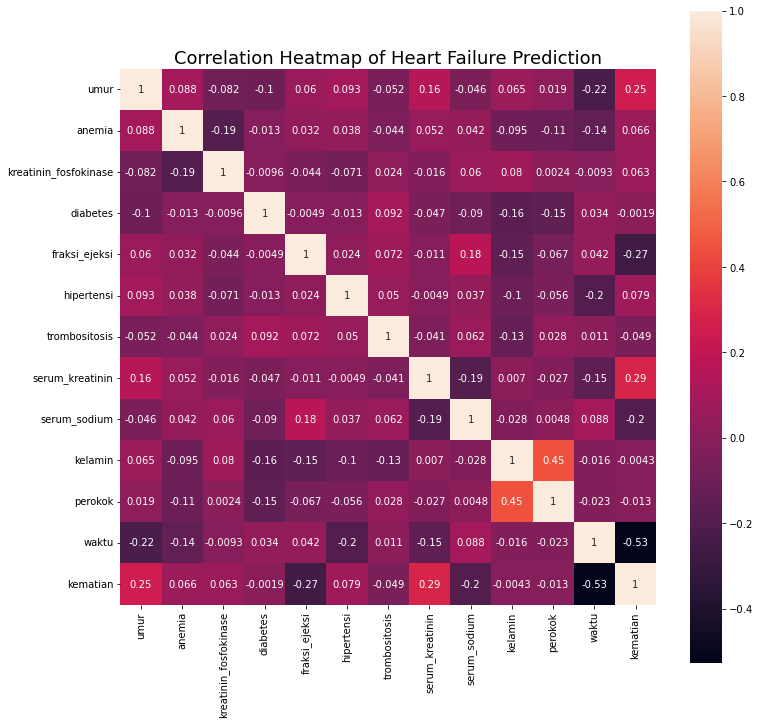

In [12]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction', fontsize =18)
fig.set_size_inches((12,12))
sns.heatmap(df.corr(), square = True, annot = True)

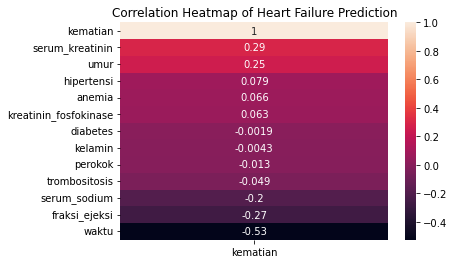

In [13]:
sns.heatmap(df.corr()[['kematian']].sort_values(by='kematian', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Pada tabel di atas terlihat bahwa nilai korelasi masing-masing variabel terhadap variabel kematian menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel kematian adalah serum kreatinin dan variabel yang memiliki korelasi sangat rendah terhadap variabel kematian adalah variabel waktu.

Distribusi Kategorikal

Berapa banyak pasien di setiap kelompok jenis kelamin?

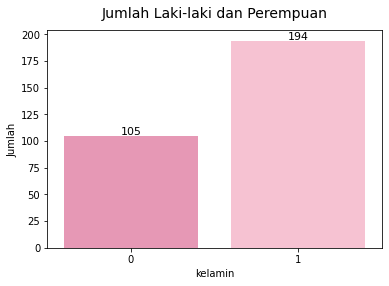

In [14]:

ax = sns.countplot(x="kelamin",
                   data = df, 
                   palette = color_mix)
ax.set_title("Jumlah Laki-laki dan Perempuan", 
             y=1.03,
             fontsize=14)
ax.set_ylabel('Jumlah')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Analisis\
Pasien perempuan sebanyak 105 orang dan laki-laki sebanyak 194 orang. Hampir dua pertiga pasien (65%) adalah laki-laki. Ada data gender yang condong seperti yang biasanya kita perkirakan perincian antara gender mendekati 50/50.

Berapa banyak pasien yang meninggal dalam kelompok studi dan di setiap kelompok jenis kelamin?

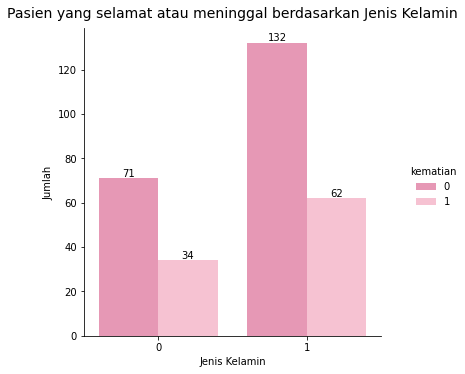

In [15]:
g = sns.catplot(x="kelamin", 
                kind="count", 
                hue="kematian", 
                data=df,
                palette = color_mix)
g.fig.suptitle("Pasien yang selamat atau meninggal berdasarkan Jenis Kelamin", y=1.03, fontsize=14)

ax = g.facet_axis(0, 0)
ax.set_xlabel('Jenis Kelamin')
ax.set_ylabel('Jumlah')

for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Analisis
1. Dari 196 laki-laki, 62 (31,6%) meninggal.
2. Dari 105 perempuan, 34 (32,4%) meninggal.
3. Secara keseluruhan, dari 299 pasien, 96 (32%) meninggal.

Berapa banyak pasien yang menderita anemia?

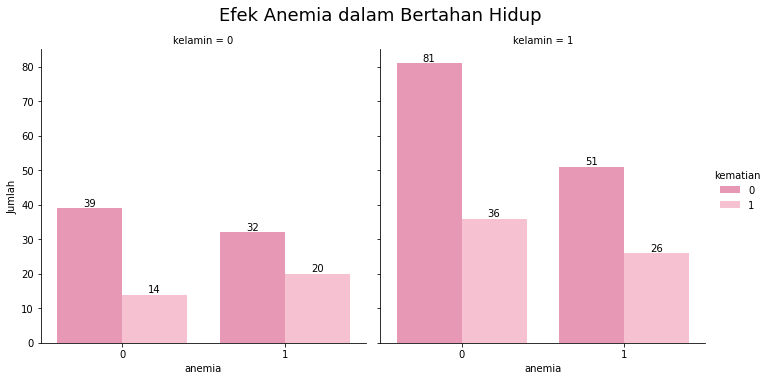

In [16]:
g = sns.catplot(x="anemia",  
                kind="count", 
                hue= "kematian", 
                col = "kelamin", 
                data = df,
                palette = color_mix)
g.fig.suptitle("Efek Anemia dalam Bertahan Hidup", 
               y=1.05, 
               fontsize=18)
g.set_ylabels('Jumlah')
# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Analisis
1. Hampir setengah dari perempuan menderita anemia.\
13% wanita yang meninggal tidak menderita anemia.\
19% wanita yang meninggal menderita anemia.
2. 40% laki-laki mengalami anemia.\
19% laki-laki yang meninggal tidak menderita anemia.\
13% laki-laki yang meninggal menderita anemia.
3. Tampaknya anemia bukan merupakan faktor risiko utama terutama pada pria.

Berapa banyak pasien yang menderita diabetes?

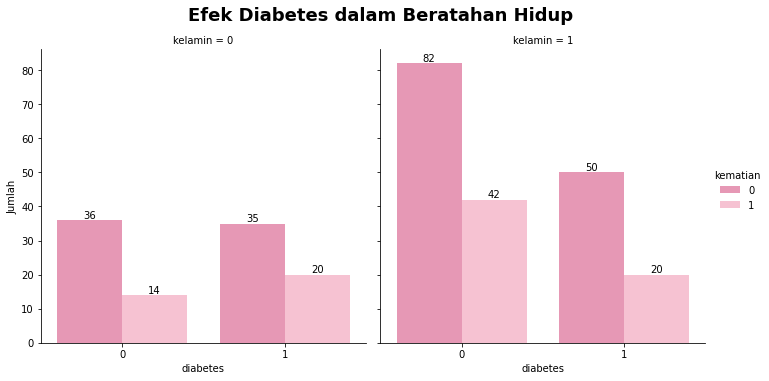

In [17]:
g = sns.catplot(x="diabetes", 
                kind="count",
                hue="kematian", 
                data = df,
                col="kelamin",
                palette = color_mix)
g.fig.suptitle("Efek Diabetes dalam Beratahan Hidup", y=1.05, fontsize=18, fontweight="bold")
g.set_ylabels('Jumlah')
# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Analisis
1. 52% wanita menderita diabetes.\
19% wanita dengan diabetes meninggal.\
13% wanita tanpa diabetes meninggal.
2. 36% pria menderita diabetes.\
10% pria dengan diabetes meninggal.\
22% pria tanpa diabetes meninggal.
3. Diabetes tampaknya bukan penyebab utama kematian di antara para pasien.

Berapa banyak pasien yang memiliki tekanan darah tinggi (hipertensi)?

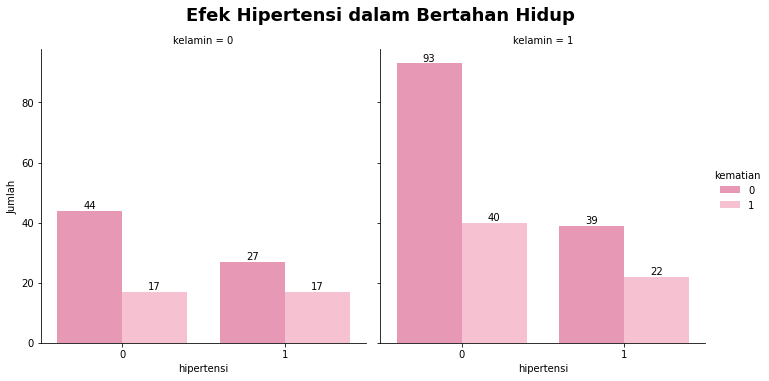

In [18]:
g = sns.catplot(x="hipertensi", 
                kind="count", 
                hue="kematian", 
                col="kelamin", 
                data = df, 
                palette=color_mix)

g.fig.suptitle("Efek Hipertensi dalam Bertahan Hidup", y=1.05, fontsize=18, fontweight="bold")
g.set_ylabels('Jumlah')
# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Analisis
1. 42% wanita memiliki tekanan darah tinggi.\
16% wanita dengan tekanan darah tinggi meninggal.\
16% wanita tanpa tekanan darah tinggi meninggal.
2. 31% pria memiliki tekanan darah tinggi.\
11% pria dengan tekanan darah tinggi meninggal.\
21% pria tanpa tekanan darah tinggi meninggal.
3. Tekanan darah tinggi saja bukanlah faktor risiko utama.

Bagaimana Efek Perokok dalam Bertahan Hidup?

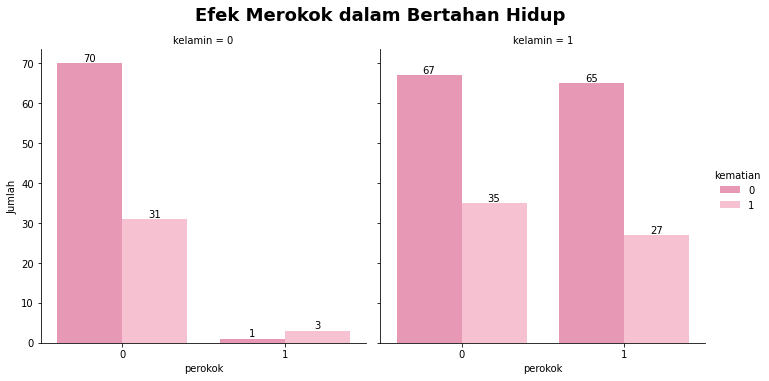

In [19]:
g = sns.catplot(x="perokok", 
                kind="count", 
                hue="kematian", 
                col="kelamin", 
                data = df, 
                palette=color_mix);

g.fig.suptitle("Efek Merokok dalam Bertahan Hidup", y=1.05, fontsize=18, fontweight="bold")
g.set_ylabels('Jumlah')
# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Analisis
1. Merokok populer di kalangan pria dibandingkan dengan wanita: 0,04% wanita merokok.\
3 dari 4 perokok pada wanita meninggal.\
30% wanita bukan perokok meninggal.
2. 47% pria merokok.\
14% perokok pria meninggal.\
18% pria bukan perokok meninggal.
3. Berdasarkan data laki-laki, merokok tampaknya tidak menjadi faktor risiko utama.

**DATA PREPROCESSING**

In [20]:
df_1 = df.copy()
df_1.head()

,umur,anemia,kreatinin_fosfokinase,diabetes,fraksi_ejeksi,hipertensi,trombositosis,serum_kreatinin,serum_sodium,kelamin,perokok,waktu,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
# we select dependent variable (label)
y = df_1["kematian"]

# we select independent variable
x = df_1.drop("kematian", axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

Dataset split :
1. Test = 20%
2. Train = 80%

Standarisasi

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train[0:5]

array([[-1.33194278,  1.11069566, -0.4576634 , -0.84818893, -0.24318058,
        -0.72269841, -0.89319445, -0.58084862,  0.51465589,  0.72941845,
         1.52297224, -0.10575054],
       [-0.4999137 , -0.90033664, -0.51894319, -0.84818893,  0.17737049,
        -0.72269841, -0.57954879, -0.39670905,  0.29500811,  0.72941845,
        -0.65661079,  1.33189826],
       [ 0.58172409,  1.11069566,  0.39546617,  1.17898261, -0.24318058,
        -0.72269841,  0.15589621, -0.30463927, -0.58358301,  0.72941845,
        -0.65661079,  0.86979686],
       [-0.08389917,  1.11069566, -0.02487488, -0.84818893, -0.66373165,
         1.38370306, -1.40151673, -0.48877884,  1.83254257, -1.37095517,
        -0.65661079, -0.43949044],
       [-0.08389917, -0.90033664, -0.35712624,  1.17898261,  0.00915007,
        -0.72269841,  0.78318753,  1.44468663,  1.17359923, -1.37095517,
        -0.65661079, -1.27384019]])

In [25]:
X_test[0:5]

array([[-0.91592824,  1.11069566, -0.47202585, -0.84818893, -1.5048338 ,
        -0.72269841, -0.73096394, -0.58084862,  0.51465589,  0.72941845,
        -0.65661079,  0.21515321],
       [-1.33194278, -0.90033664, -0.02487488,  1.17898261,  1.43902371,
        -0.72269841,  3.09767621, -0.39670905, -1.02287857, -1.37095517,
        -0.65661079,  1.55011281],
       [-0.66631952,  1.11069566, -0.49500577, -0.84818893, -1.5048338 ,
         1.38370306,  1.74575525, -0.02842992,  0.51465589, -1.37095517,
        -0.65661079, -1.10697024],
       [-0.74952242, -0.90033664, -0.4557484 , -0.84818893, -0.66373165,
        -0.72269841, -0.41731828, -0.67291841, -0.14428745,  0.72941845,
         1.52297224, -0.22127589],
       [ 0.33211537,  1.11069566, -0.45287591, -0.84818893, -0.24318058,
         1.38370306,  0.36138819, -0.58084862, -0.58358301,  0.72941845,
        -0.65661079,  0.83128841]])

**DATA MODELLING**

Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_predLR)
accuracy_LR

0.8833333333333333

In [27]:
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



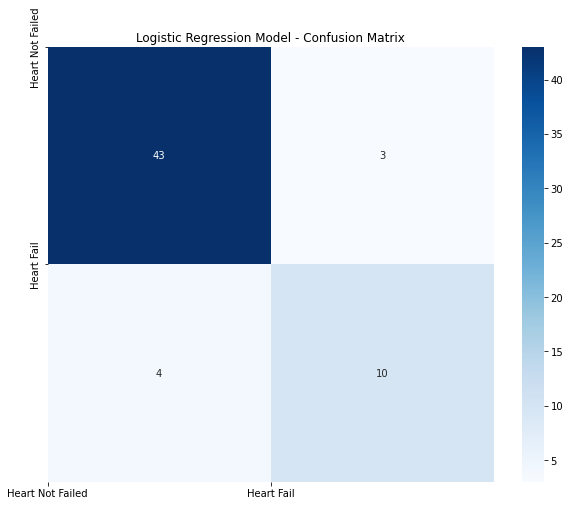

In [28]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_predLR), annot=True, fmt=".0f", ax=ax, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 43 prediksi true negatif
- 3 prediksi false negatif
- 4 prediksi false positif
- 10 prediksi true positif

Hasil Akurasi menggunakan Logistic Regression model adalah 88%

Support Vector Machine (SVM) Model

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelSVC = SVC()
modelSVC.fit(X_train, y_train)
y_predSVC = modelSVC.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_predSVC)
accuracy_SVM

0.9

In [30]:
print(classification_report(y_test, y_predSVC))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.83      0.71      0.77        14

    accuracy                           0.90        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.90      0.90      0.90        60



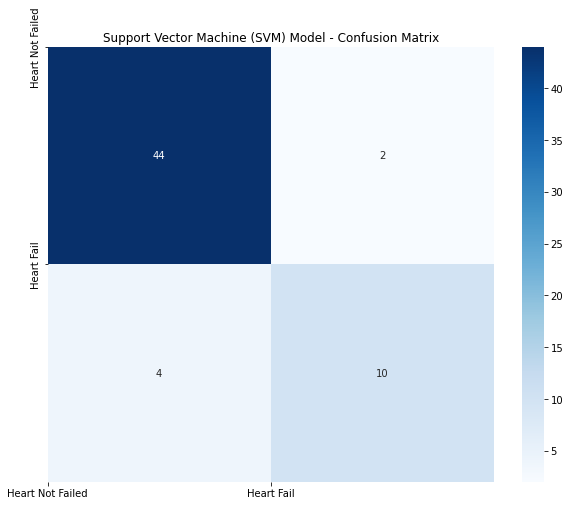

In [31]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_predSVC), annot=True, fmt=".0f", ax=ax, cmap=plt.cm.Blues)
plt.title("Support Vector Machine (SVM) Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 44 prediksi true negatif
- 2 prediksi false negatif
- 4 prediksi false positif
- 10 prediksi true positif

Hasil Akurasi menggunakan Support Vector Machine model adalah 90%

Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_predDT)
accuracy_DT

0.8333333333333334

In [33]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.64      0.64      0.64        14

    accuracy                           0.83        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.83      0.83      0.83        60



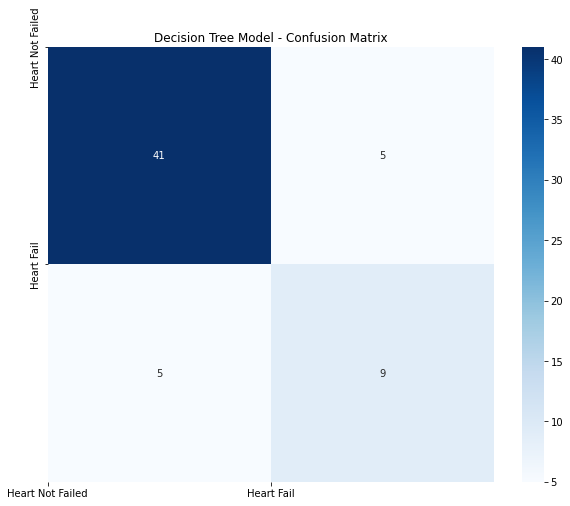

In [34]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_predDT), annot=True, fmt=".0f", ax=ax, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 39 prediksi true negatif
- 7 prediksi false negatif
- 5 prediksi false positif
- 9 prediksi true positif

Hasil Akurasi menggunakan Decision Tree model adalah 80%

K-Nearest Neighbour Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train,y_train)
y_predKNN = modelKNN.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_predKNN)
accuracy_KNN

0.7833333333333333

In [36]:
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.56      0.36      0.43        14

    accuracy                           0.78        60
   macro avg       0.69      0.64      0.65        60
weighted avg       0.76      0.78      0.77        60



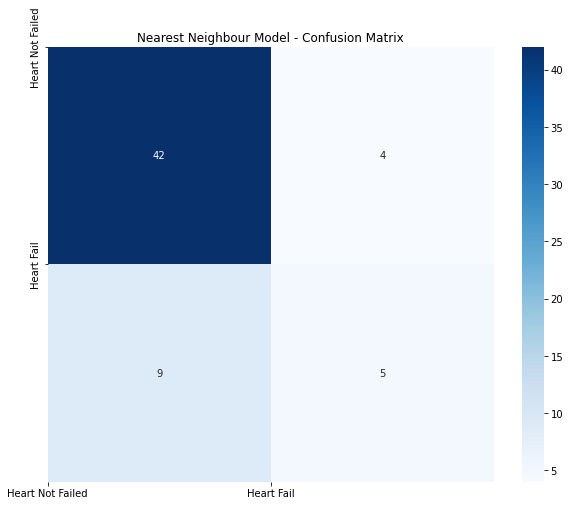

In [37]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_predKNN), annot=True, fmt=".0f", ax=ax, cmap=plt.cm.Blues)
plt.title("Nearest Neighbour Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 42 prediksi true negatif
- 4 prediksi false negatif
- 9 prediksi false positif
- 5 prediksi true positif

Hasil Akurasi menggunakan K-Nearest Neighbour model adalah 78%

Random Forest

In [38]:
# RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_predRF)
accuracy_RF

0.9166666666666666

In [39]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.85      0.79      0.81        14

    accuracy                           0.92        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.92      0.92      0.92        60



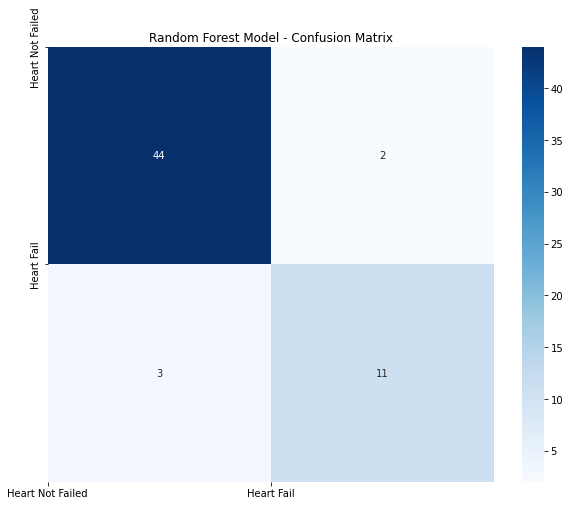

In [40]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_predRF), annot=True, fmt=".0f", ax=ax, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 44 prediksi true negatif
- 2 prediksi false negatif
- 4 prediksi false positif
- 10 prediksi true positif

Hasil Akurasi menggunakan Random Forest model adalah 90%

In [41]:
print('Hasil Akurasi Model')
print('Logistic Regression :',accuracy_LR)
print('Support Vector Machine (SVM) :',accuracy_SVM)
print('Decision Tree :',accuracy_DT)
print('K-Nearest Neighbour (KNN) :',accuracy_KNN)
print('Random Forest :',accuracy_RF)

Hasil Akurasi Model
Logistic Regression : 0.8833333333333333
Support Vector Machine (SVM) : 0.9
Decision Tree : 0.8333333333333334
K-Nearest Neighbour (KNN) : 0.7833333333333333
Random Forest : 0.9166666666666666


In [42]:
df_1[df_1.kematian == 1].head(3)

,umur,anemia,kreatinin_fosfokinase,diabetes,fraksi_ejeksi,hipertensi,trombositosis,serum_kreatinin,serum_sodium,kelamin,perokok,waktu,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [43]:
df_1[df_1.kematian == 0].head(3)

,umur,anemia,kreatinin_fosfokinase,diabetes,fraksi_ejeksi,hipertensi,trombositosis,serum_kreatinin,serum_sodium,kelamin,perokok,waktu,kematian
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0


In [44]:
columns =  ['umur',
            'anemia',
            'kreatinin_fosfokinase',
            'diabetes',
            'fraksi_ejeksi',
            'hipertensi',
            'trombositosis',
            'serum_kreatinin',
            'serum_sodium',
            'kelamin',
            'perokok',
            'waktu']
new_data_died = [20, 1, 82, 0, 70, 1, 365000, 1.9, 80, 1, 0, 4]
new_data_lived = [89, 0, 80, 0, 30, 1, 427000, 1, 38, 1, 1, 12]

In [45]:
df_data = pd.DataFrame([new_data_died, new_data_lived], columns=columns)
df_data

,umur,anemia,kreatinin_fosfokinase,diabetes,fraksi_ejeksi,hipertensi,trombositosis,serum_kreatinin,serum_sodium,kelamin,perokok,waktu
0,20,1,82,0,70,1,365000,1.9,80,1,0,4
1,89,0,80,0,30,1,427000,1.0,38,1,1,12


In [46]:
output = {0:'Lived',1:'Died'}

In [47]:
# Logistic Regression
print(output[modelLR.predict(df_data)[0]])

Lived


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [48]:
# Random Forest
print(output[modelRF.predict(df_data)[0]])

Lived


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [49]:
# Decision Tree
print(output[modelDT.predict(df_data)[0]])

Lived


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [50]:
# Support Vector Machine
print(output[modelSVC.predict(df_data)[0]])

Died


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [51]:
# K-Nearest Neighbour
print(output[modelKNN.predict(df_data)[0]])

Lived


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Berdasarkan perhitungan diatas, model Random Forest memilki tingkat akurasi yang paling tinggi diiantara model-model yang lain.

In [53]:
pickle.dump(modelRF, open('model_classifier.pkl','wb'))